In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Configuração para gráficos mais bonitos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)

# Dados da multiplicação escalar (scalar_matrix_mult)
matrix_sizes_scalar = ['800x1600', '1600x2400', '2400x3200', '3200x4000']
incrementando_vetor = [4.4, 13.59, 26.57, 44.85]
linha_por_linha = [6.454, 18.664, 34.56, 57.355]
coluna_por_coluna = [7.538, 52.841, 117.16, 185.302]
cuda_scalar = [79.19, 101.121, 216.444, 141.413]

# Dados da multiplicação matriz-matriz (matrix_matrix_mult)
matrix_sizes_mult = ['800x1600x2400', '1600x2400x3200', '2400x3200x4000', '3200x4000x4800']
linha_por_linha_mult = [8046.153, 32265.399, 80886.93, 162208.059]
convencional_mult = [14547.930, 78705.881, 201205.731, 429485.030]
cuda_mult = [18.260, 59.557, 163.913, 239.317]

print("Dados carregados com sucesso!")
print(f"Multiplicação Escalar - {len(matrix_sizes_scalar)} configurações")
print(f"Multiplicação Matriz-Matriz - {len(matrix_sizes_mult)} configurações")


Dados carregados com sucesso!
Multiplicação Escalar - 4 configurações
Multiplicação Matriz-Matriz - 4 configurações


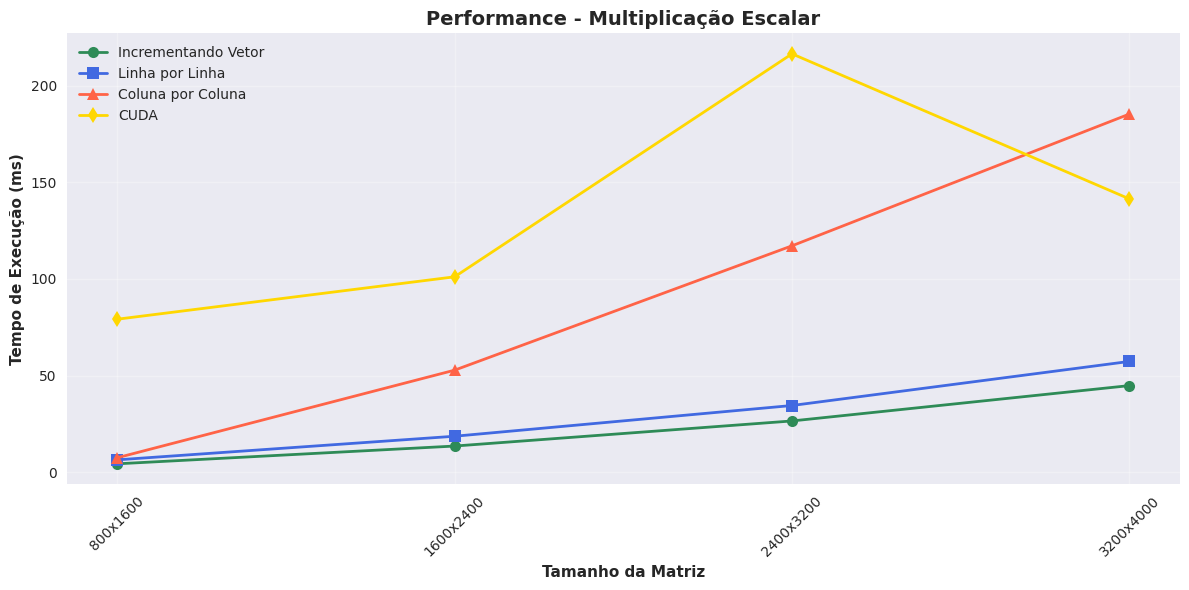

In [4]:
# Gráfico 1: Comparação das implementações de multiplicação escalar
plt.figure(figsize=(12, 6))

plt.plot(matrix_sizes_scalar, incrementando_vetor, 'o-', linewidth=2, markersize=8, label='Incrementando Vetor', color='#2E8B57')
plt.plot(matrix_sizes_scalar, linha_por_linha, 's-', linewidth=2, markersize=8, label='Linha por Linha', color='#4169E1')
plt.plot(matrix_sizes_scalar, coluna_por_coluna, '^-', linewidth=2, markersize=8, label='Coluna por Coluna', color='#FF6347')
plt.plot(matrix_sizes_scalar, cuda_scalar, 'd-', linewidth=2, markersize=8, label='CUDA', color='#FFD700')

plt.title('Performance - Multiplicação Escalar', fontsize=14, fontweight='bold')
plt.xlabel('Tamanho da Matriz', fontweight='bold')
plt.ylabel('Tempo de Execução (ms)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


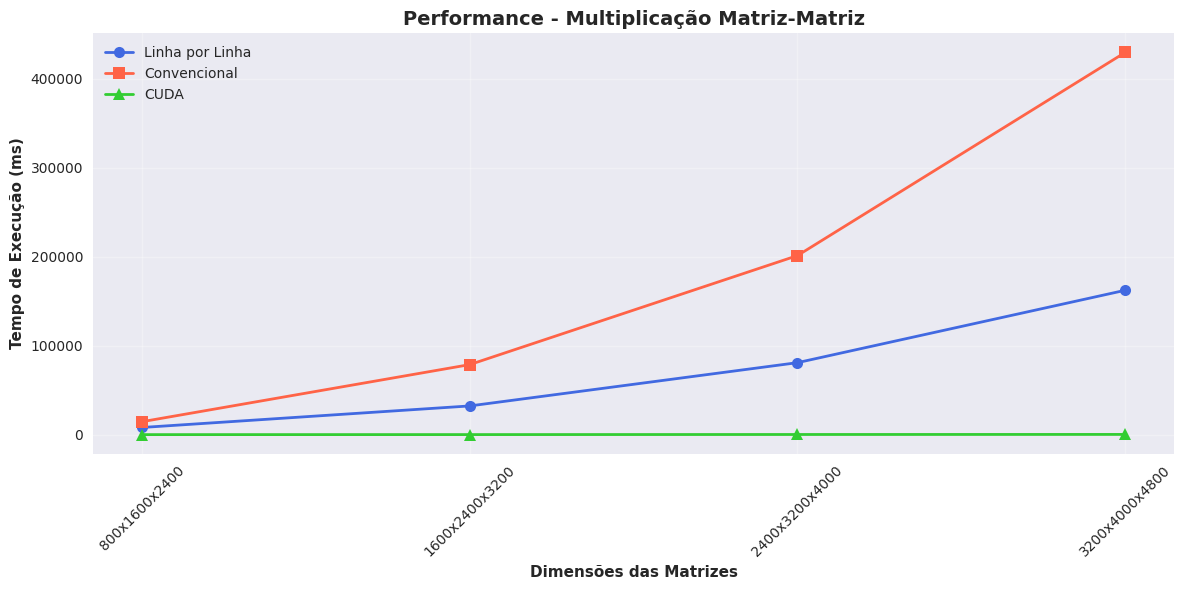

In [5]:
# Gráfico 2: Comparação das implementações de multiplicação matriz-matriz
plt.figure(figsize=(12, 6))

plt.plot(matrix_sizes_mult, linha_por_linha_mult, 'o-', linewidth=2, markersize=8, label='Linha por Linha', color='#4169E1')
plt.plot(matrix_sizes_mult, convencional_mult, 's-', linewidth=2, markersize=8, label='Convencional', color='#FF6347')
plt.plot(matrix_sizes_mult, cuda_mult, '^-', linewidth=2, markersize=8, label='CUDA', color='#32CD32')

plt.title('Performance - Multiplicação Matriz-Matriz', fontsize=14, fontweight='bold')
plt.xlabel('Dimensões das Matrizes', fontweight='bold')
plt.ylabel('Tempo de Execução (ms)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [6]:
# Tabela de speedup para multiplicação matriz-matriz
import pandas as pd

# Criando DataFrame com os dados
data = {
    'Configuração': matrix_sizes_mult,
    'Linha por Linha (ms)': linha_por_linha_mult,
    'Convencional (ms)': convencional_mult,
    'CUDA (ms)': cuda_mult
}

df = pd.DataFrame(data)

# Calculando speedups
df['Speedup vs Linha por Linha'] = df['Linha por Linha (ms)'] / df['CUDA (ms)']
df['Speedup vs Convencional'] = df['Convencional (ms)'] / df['CUDA (ms)']

# Formatando para melhor visualização
df_display = df.copy()
df_display['Speedup vs Linha por Linha'] = df_display['Speedup vs Linha por Linha'].map('{:.1f}x'.format)
df_display['Speedup vs Convencional'] = df_display['Speedup vs Convencional'].map('{:.1f}x'.format)

print("=== TABELA DE PERFORMANCE - MULTIPLICAÇÃO MATRIZ-MATRIZ ===")
print(df_display.to_string(index=False))

# Estatísticas adicionais
print(f"\n=== ESTATÍSTICAS ADICIONAIS ===")
print(f"Speedup médio CUDA vs Linha por Linha: {df['Speedup vs Linha por Linha'].mean():.1f}x")
print(f"Speedup médio CUDA vs Convencional: {df['Speedup vs Convencional'].mean():.1f}x")
print(f"Speedup máximo CUDA vs Convencional: {df['Speedup vs Convencional'].max():.1f}x")


=== TABELA DE PERFORMANCE - MULTIPLICAÇÃO MATRIZ-MATRIZ ===
  Configuração  Linha por Linha (ms)  Convencional (ms)  CUDA (ms) Speedup vs Linha por Linha Speedup vs Convencional
 800x1600x2400              8046.153          14547.930     18.260                     440.6x                  796.7x
1600x2400x3200             32265.399          78705.881     59.557                     541.8x                 1321.5x
2400x3200x4000             80886.930         201205.731    163.913                     493.5x                 1227.5x
3200x4000x4800            162208.059         429485.030    239.317                     677.8x                 1794.6x

=== ESTATÍSTICAS ADICIONAIS ===
Speedup médio CUDA vs Linha por Linha: 538.4x
Speedup médio CUDA vs Convencional: 1285.1x
Speedup máximo CUDA vs Convencional: 1794.6x
